# Statistical Data Science with Python Final Project: Abstraction and Reasoning Challenge

## by Austin Gallyer, Changhee Suh, & Jae Young Kim

### Introduction to the problem

Machine learning uses statistical models to make sense of data. Advances in machine learning over the past few decades has made it easier to solve many different kinds of problems, from developments in computer vision, to using machine learning to predict suicidal behavior. Though these developments have made machines closer to being able to mimic human behavior and cognition, there are still areas in need of improvement. For example, most machine learning or artificial intelligence models require a large amount of data to learn how to solve problems. In contrast, humans can be presented with few examples, learn the pattern, and then solve the problem with high accuracy. The need for innovation to address this problem is what led to the development of the [Abstraction and Reasoning Challenge](https://www.kaggle.com/c/abstraction-and-reasoning-challenge/overview).

On each trial of this challenge, a series of three-to-five input-output grids are presented, like those below: 

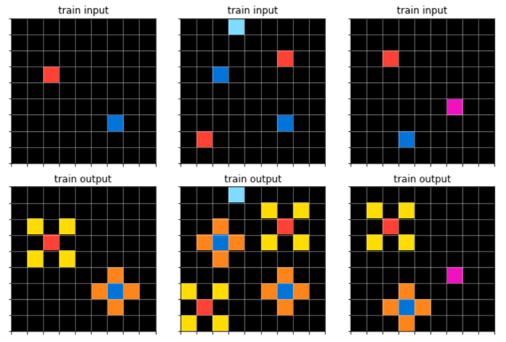

Here, we have three inputs and their corresponding outputs, or solutions. From this, we can see that to solve this problem, red squares are given yellow squares touching each of the four corners, whereas darker blue squares get orange squares touching each of their four sides, and all other colored squares are ignored. 

<img src="https://i.postimg.cc/8CC7QRby/sdfsdf.png" width=250>

Finally, we have the test input and the solution (called test output). It is the test output, corresponding to the test input, that the model must solve. This challenge is unique because each problem only has a few examples for the model to try and learn the pattern. A model that can solve this task with high accuracy would be much closer to mirroring human cognition. 

### Structure of the data

For this project, we are using two data sets from this challenge. The first is the training data set, which consists of 400 tasks, with each task consisting of three-to-five input-output pairs, and then one testing input-output pair. The second is the evaluation data set, which has the same structure as the training data set. We will first use our model on the training data to examine its accuracy. Then, we will apply the model to the evaluation data set. 

### Method

To solve this problem, we used a convolutional neural network (CNN) with the following specifications: ten input channels, ten output channels, a kernel size of five, and 10,000 epochs. We opted to use the Adam (Adaptive Moment Estimation) optimizer, RMSProp and Momentum. Our loss function was the Cross-Entropy loss function. To calculate the accuracy of our model, we took two approaches:

1. Calculate how many outputs were predicted exactly correct, out of 400 tasks. 

2. Classify model predictions into three groups ( Similar to original, Many error occur, Completely different).


The first accuracy method simply compares the predicted image with the actual image to determine whether they are the same or different. However, the second method is to measure how close the image we predicted is to the actual image. Therefore, it was divided into three categories according to the similarity between the actual image and the image we predicted. 



The first step in our analysis is to import the modules we need.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import json
import os
from os.path import join as path_join
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib import colors
import random
import torch
from torch.nn import CrossEntropyLoss
from torch.optim import Adam
from torch.nn import Conv2d
from torch import FloatTensor, LongTensor

Now that we have all of the modules we need, we will next load in the data. 

In [3]:
# This function takes the listed path, then returns each of the tasks
def load_data(path):
    tasks = pd.Series()
    for file_path in os.listdir(path):
        task_file = path_join(path, file_path)

        with open(task_file, 'r') as f:
            task = json.load(f)

        tasks[file_path[:-5]] = task
    return tasks
# Get the current working directory path and store it
data_path = os.getcwd()# Note, the current working directory should have the training and evaluation subdirectories in it. Otherwise, it will not work
# Append training directory name to full path
training_path = data_path + '\\training' #note, this was done on a windows, necessitating need for \\. You may need to change this depending on your OS
#Append evaluation directory name to full path
evaluation_path = data_path + '\\evaluation'

# Load training and evaluation data
train_tasks = load_data(training_path)
evaluation_tasks = load_data(evaluation_path)

<ipython-input-3-4322b630273b>:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  tasks = pd.Series()


Now that we have loaded in the data, we want to get a sense of the data set. We will do this using the .head() function.

In [4]:
train_tasks.head()

007bbfb7    {'test': [{'input': [[7, 0, 7], [7, 0, 7], [7,...
00d62c1b    {'train': [{'input': [[0, 0, 0, 0, 0, 0], [0, ...
017c7c7b    {'train': [{'input': [[0, 1, 0], [1, 1, 0], [0...
025d127b    {'train': [{'input': [[0, 0, 0, 0, 0, 0, 0, 0,...
045e512c    {'train': [{'input': [[0, 0, 0, 0, 0, 0, 0, 0,...
dtype: object

In [9]:
evaluation_tasks.head()

00576224    {'train': [{'input': [[8, 6], [6, 4]], 'output...
009d5c81    {'train': [{'input': [[0, 0, 0, 0, 0, 0, 0, 0,...
00dbd492    {'train': [{'input': [[2, 2, 2, 2, 2, 0, 0], [...
03560426    {'train': [{'input': [[0, 0, 0, 0, 0, 0, 0, 0,...
05a7bcf2    {'train': [{'input': [[0, 0, 0, 0, 0, 0, 0, 0,...
dtype: object

We can also confirm that we have 400 tasks in each data set by using the length function. The distribution of data per 1 task is shown in the graph below. Looking at this graph, the number of data per task seems to be small. (Average of three)

The number of tasks in Train set      :  400
The number of tasks in Evaluation set :  400


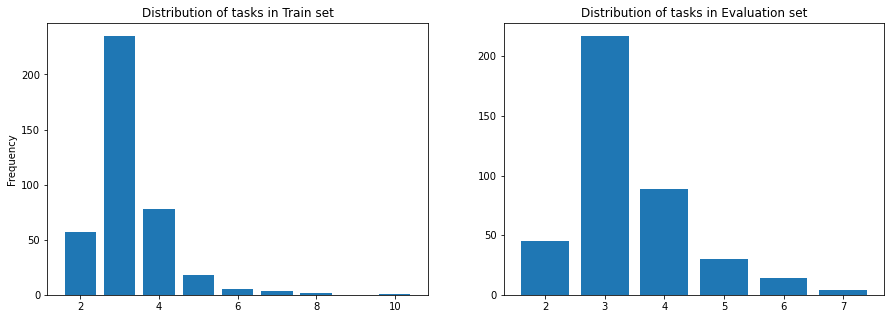

In [5]:
print("The number of tasks in Train set      : ", len(train_tasks))
print("The number of tasks in Evaluation set : ", len(train_tasks))

train_num=[]
for tt in range(0,399):
    train_num.append(len(train_tasks[tt]['train']))
train_num_unique, train_num_counts =np.unique(train_num, return_counts=True)

evaluation_num=[]
for tt in range(0,399):
    evaluation_num.append(len(evaluation_tasks[tt]['train']))
evaluation_num_unique, evaluation_num_counts =np.unique(evaluation_num, return_counts=True)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].bar(train_num_unique,train_num_counts)
ax[0].title.set_text('Distribution of tasks in Train set')
ax[0].set_ylabel('Frequency')
ax[1].bar(evaluation_num_unique,evaluation_num_counts)
ax[1].title.set_text('Distribution of tasks in Evaluation set')
ax[0].set_ylabel('Frequency')
plt.show()



Next, we will visualize a few random examples, showing only one of the training pairs, and the test pair, from the training data set. 

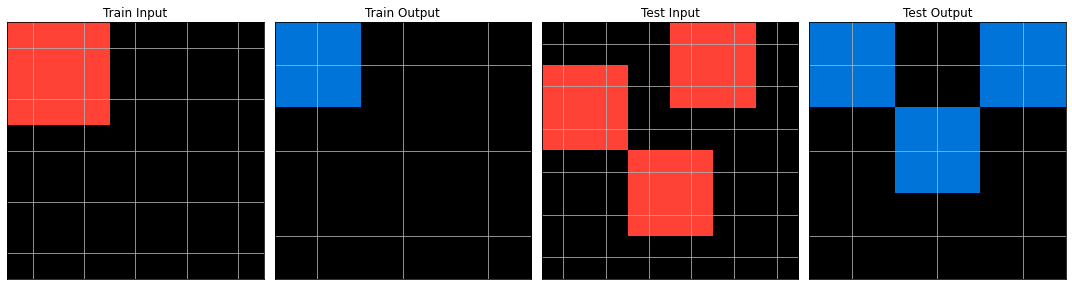

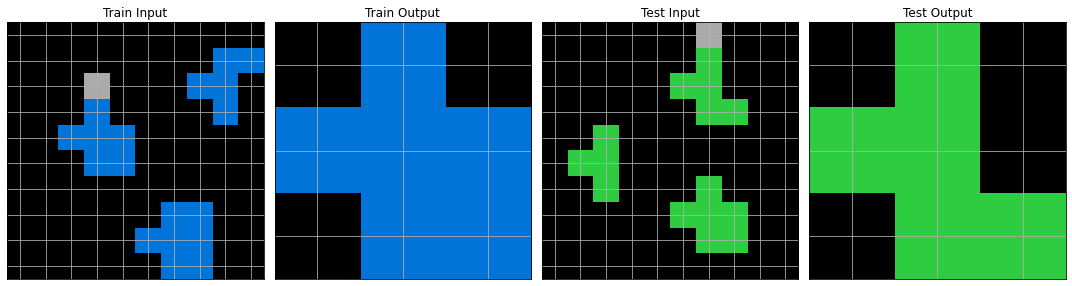

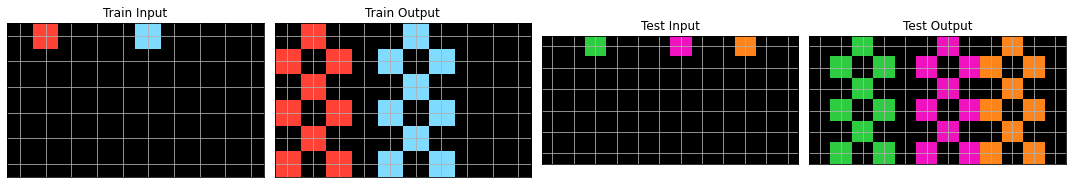

In [6]:
#This function plots the first train pair and the test pair for a given task
def plot_task(task):
   
    cmap = colors.ListedColormap(
        ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
         '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
    norm = colors.Normalize(vmin=0, vmax=9)
    fig, ax = plt.subplots(1, 4, figsize=(15,15))
    ax[0].imshow(task['train'][0]['input'], cmap=cmap, norm=norm)
    width = np.shape(task['train'][0]['input'])[1]
    height = np.shape(task['train'][0]['input'])[0]
    ax[0].set_xticks(np.arange(0,width))
    ax[0].set_yticks(np.arange(0,height))
    ax[0].set_xticklabels([])
    ax[0].set_yticklabels([])
    ax[0].tick_params(length=0)
    ax[0].grid(True)
    ax[0].set_title('Train Input')
    ax[1].imshow(task['train'][0]['output'], cmap=cmap, norm=norm)
    width = np.shape(task['train'][0]['output'])[1]
    height = np.shape(task['train'][0]['output'])[0]
    ax[1].set_xticks(np.arange(0,width))
    ax[1].set_yticks(np.arange(0,height))
    ax[1].set_xticklabels([])
    ax[1].set_yticklabels([])
    ax[1].tick_params(length=0)
    ax[1].grid(True)
    ax[1].set_title('Train Output')
    ax[2].imshow(task['test'][0]['input'], cmap=cmap, norm=norm)
    width = np.shape(task['test'][0]['input'])[1]
    height = np.shape(task['test'][0]['input'])[0]
    ax[2].set_xticks(np.arange(0,width))
    ax[2].set_yticks(np.arange(0,height))
    ax[2].set_xticklabels([])
    ax[2].set_yticklabels([])
    ax[2].tick_params(length=0)
    ax[2].grid(True)
    ax[2].set_title('Test Input')
    ax[3].imshow(task['test'][0]['output'], cmap=cmap, norm=norm)
    width = np.shape(task['test'][0]['output'])[1]
    height = np.shape(task['test'][0]['output'])[0]
    ax[3].set_xticks(np.arange(0,width))
    ax[3].set_yticks(np.arange(0,height))
    ax[3].set_xticklabels([])
    ax[3].set_yticklabels([])
    ax[3].tick_params(length=0)
    ax[3].grid(True)
    ax[3].set_title('Test Output')
    plt.tight_layout()
    plt.show()

    
randomlist = random.sample(range(0, 399), 3)# create random list of numbers between 0 to 399 (i.e., range of idices in training data set)

for task in randomlist: # simple for loop to plot the three randomly chosen tasks
    plot_task(train_tasks[task])


Now we will set up our model, as well as a number of functions needed for our model to work. 

In [7]:
def inp2img(inp):
    inp = np.array(inp)
    img = np.full((10, inp.shape[0], inp.shape[1]), 0, dtype=np.uint8)
    for i in range(10):
        img[i] = (inp==i)
    return img


class TaskSolver: # The main task class function.        
    def train(self, task_train, n_epoch=10000):# Epochs set to 10,000
        """basic pytorch train loop"""
        self.net = torch.nn.Sequential(
            Conv2d(in_channels=10, out_channels=10, kernel_size=5, padding=2),
            #Conv2d(128, 128, kernel_size=3, padding=1),
            #nn.ReLU(),
            #nn.Conv2d(10, 10, kernel_size=1)
        )
        criterion = CrossEntropyLoss()# specify loss-function criteria
        optimizer = Adam(self.net.parameters(), lr = 0.1)# choose optimizer
        
        for epoch in range(n_epoch):# 
            for sample in task_train:
                
                inputs = FloatTensor(inp2img(sample['input'])).unsqueeze(dim=0)
                labels = LongTensor(sample['output']).unsqueeze(dim=0)
                
                optimizer.zero_grad()
                outputs = self.net(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
        
        return self
            
    def predict(self, task_test):
        predictions = []
        with torch.no_grad():
            for sample in task_test:
                inputs = FloatTensor(inp2img(sample['input'])).unsqueeze(dim=0)
                outputs = self.net(inputs)
                pred =  outputs.squeeze(dim=0).cpu().numpy().argmax(0)
                predictions.append(pred)
                                     
        return predictions
    

#Function to determine whether input and output dimensions are the same
def input_output_shape_is_same(task):
    return all([np.array(el['input']).shape == np.array(el['output']).shape for el in task['train']])

def calk_score(task_test, predict):
    return [int(np.equal(sample['output'], pred).all()) for sample, pred in zip(task_test, predict)]

# Accuracy_score function 1
def evaluate(tasks):
    ts = TaskSolver()
    result = []
    predictions = []
    for task in tqdm(tasks):
        if input_output_shape_is_same(task):
            ts.train(task['train'])
            pred = ts.predict(task['test'])
            score = calk_score(task['test'], pred)
        else:
            pred = [el['input'] for el in task['test']]
            score = [0]*len(task['test'])
        
        predictions.append(pred)
        result.append(score)
       
    return result, predictions

# Accuracy_score function 2
def evaluate2(predictions, tasks, lowerbound=0.04 , upperbound = 0.8):
    res_1=[]
    res_2=[]
    res_3=[]
    
    for tt in range(0,400):
        c1 = predictions[tt]
        if len(tasks[tt]['test']) == 1 :
            c2 = [ tasks[tt]['test'][0]['output'] ]
        elif len(tasks[tt]['test']) == 2 :
            c2 = [ tasks[tt]['test'][0]['output'] , tasks[tt]['test'][1]['output'] ]
        else : 
            c2 = [tasks[tt]['test'][0]['output'] , tasks[tt]['test'][1]['output'], tasks[tt]['test'][2]['output']]
        
        if len(tasks[tt]['test']) == 2 and  not(np.shape(c1[0]) == np.shape(c1[1]) ):
            res_1.append(0)
        elif len (np.shape(c1)) > 2 and np.shape(c1)[1] == np.shape(c2)[1] and np.shape(c1)[2] == np.shape(c2)[2]:
            temp = np.subtract(c1, c2)
            res_1.append(1)
            res_2.append(temp)
            res_3.append(np.mean(temp))
        else :
            res_1.append(0)
    
    res_df = pd.DataFrame(
               {'Class':['Similar to original', 'Many error occur', 'Completely different'],
                'Counts':[sum(np.abs(res_3) <= lowerbound), 
                          (sum(res_1) - sum(np.abs(res_3) <= lowerbound) - sum(np.abs(res_3) > upperbound) ), 
                          (len(res_1)-sum(res_1)+ sum(np.abs(res_3) > upperbound))],
                 'Percents':[sum(np.abs(res_3) <= lowerbound)/len(res_1), 
                              (sum(res_1) - sum(np.abs(res_3) <= lowerbound) - sum(np.abs(res_3) > upperbound) ) /len(res_1), 
                             (len(res_1)-sum(res_1)+ sum(np.abs(res_3) > upperbound))/len(res_1)] } )
    
    return res_df

### Results

#### Training Data

Our model was able to solve 5% of the tasks perfectly. It can be seen that the close-predicted image, including exactly the same, is 13.5% percent, and the completely differently predicted image is 46.8% according to the second method,

In [8]:
train_result, train_predictions = evaluate(train_tasks)
train_solved = [any(score) for score in train_result]

total = sum([len(score) for score in train_result])
print(f"solved : {sum(train_solved)} from {total} ({sum(train_solved)/total})")

100%|██████████| 400/400 [1:10:42<00:00, 10.61s/it]

solved : 21 from 416 (0.05048076923076923)


In [9]:
print('Accuracy method2 of train')
evaluate2(predictions = train_predictions, tasks = train_tasks)

Accuracy method2 of train


C:\Users\AGall\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


,Class,Counts,Percents
0,Similar to original,54,0.1350
1,Many error occur,159,0.3975
2,Completely different,187,0.4675


0it [00:00, ?it/s]

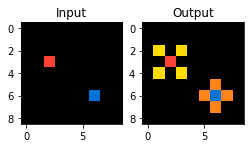

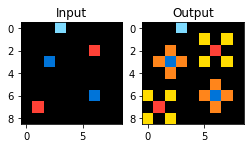

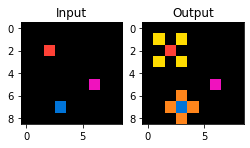

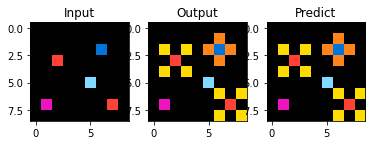

15it [00:00, 17.69it/s]

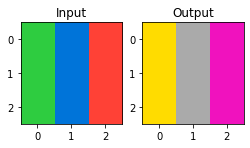

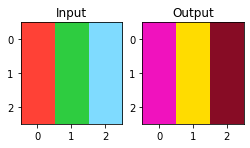

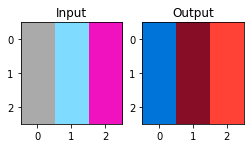

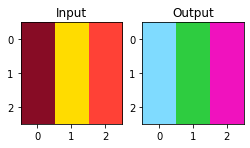

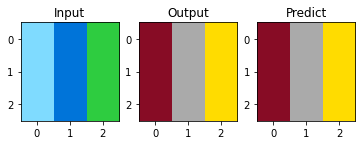

17it [00:01,  8.16it/s]

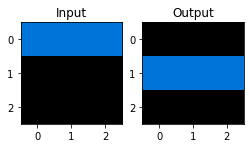

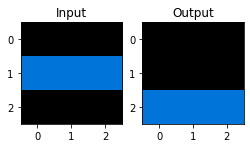

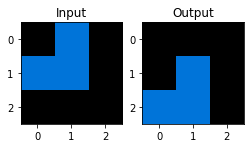

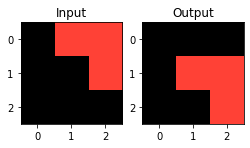

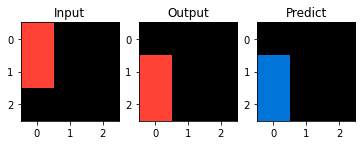

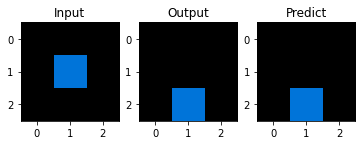

53it [00:03, 18.85it/s]

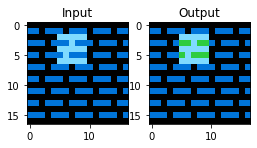

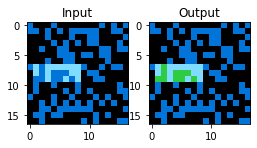

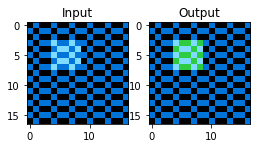

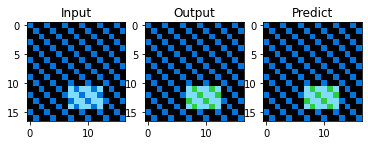

70it [00:03, 20.29it/s]

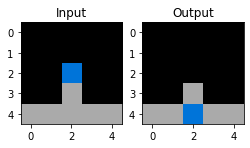

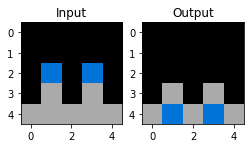

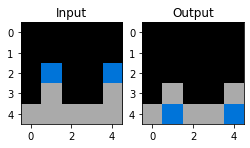

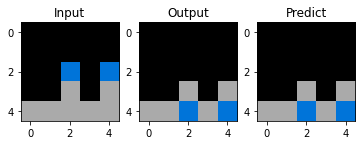

73it [00:04, 15.22it/s]

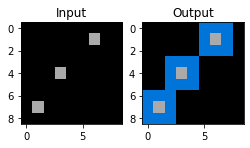

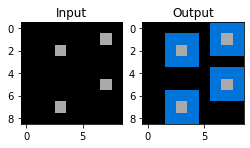

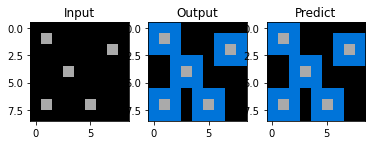

95it [00:05, 20.02it/s]

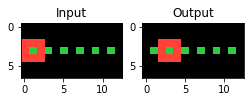

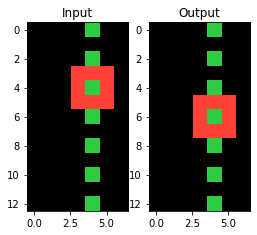

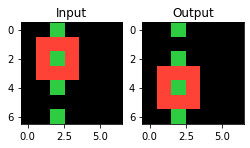

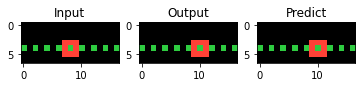

122it [00:05, 25.01it/s]

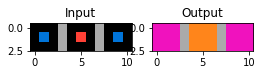

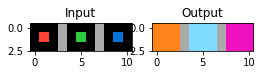

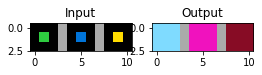

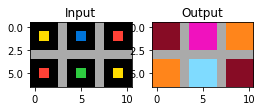

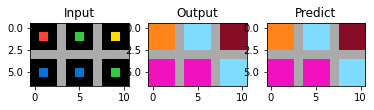

127it [00:06, 18.66it/s]

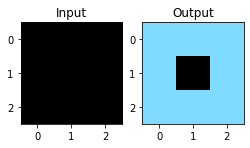

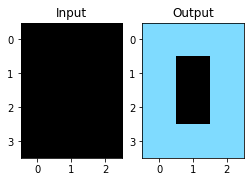

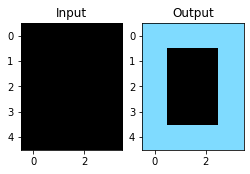

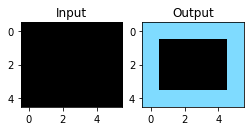

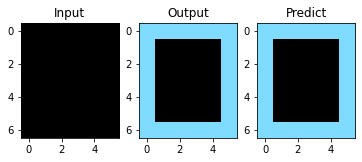

171it [00:07, 27.88it/s]

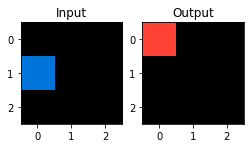

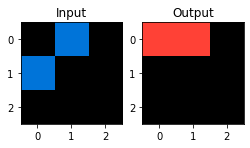

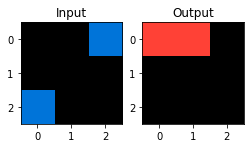

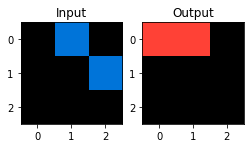

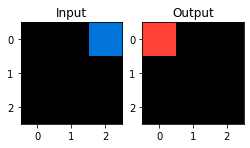

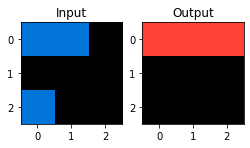

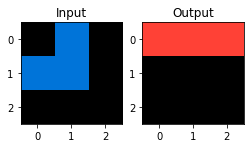

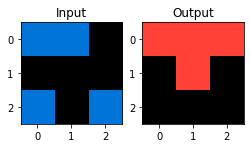

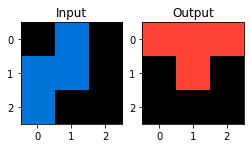

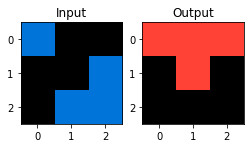

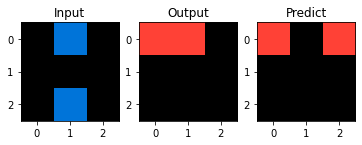

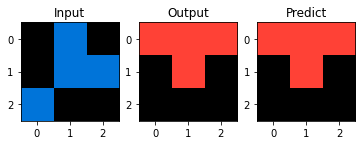

186it [00:09, 17.08it/s]

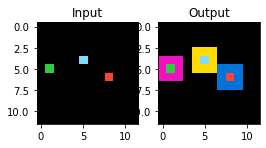

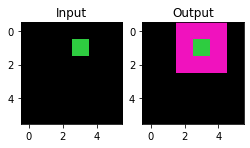

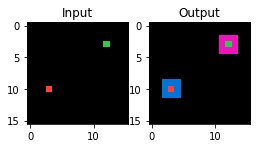

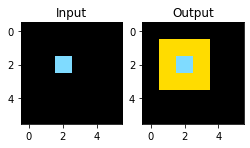

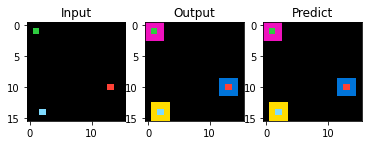

220it [00:10, 23.38it/s]

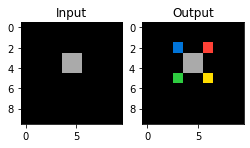

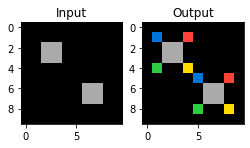

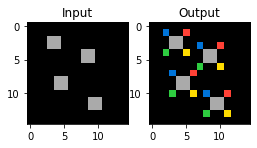

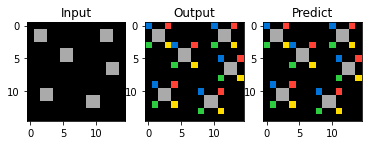

230it [00:11, 22.32it/s]

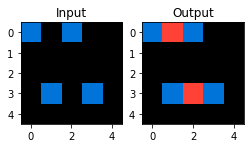

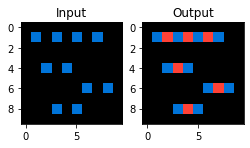

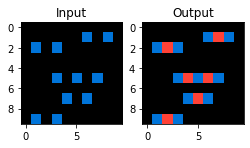

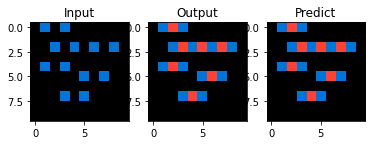

258it [00:11, 26.87it/s]

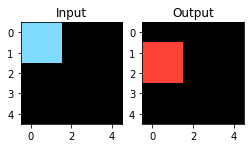

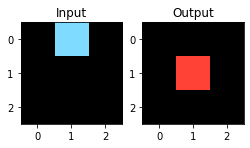

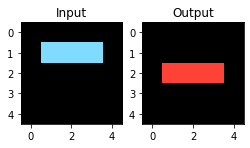

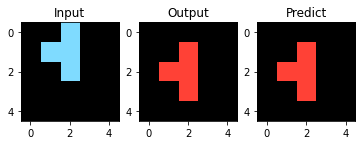

262it [00:12, 22.16it/s]

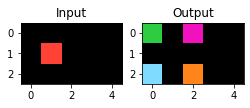

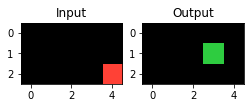

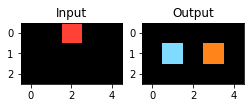

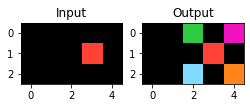

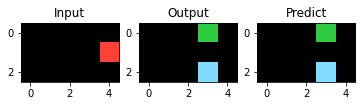

266it [00:13, 17.67it/s]

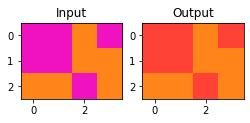

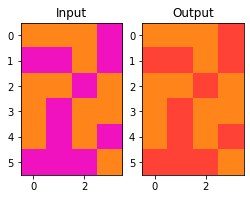

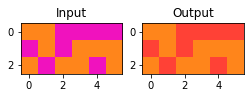

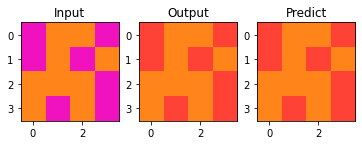

276it [00:13, 17.11it/s]

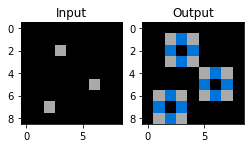

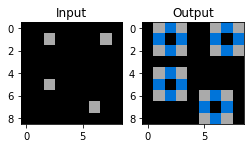

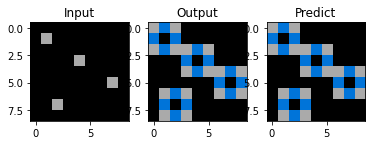

282it [00:14, 16.32it/s]

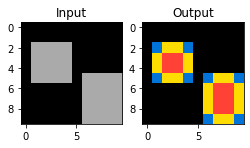

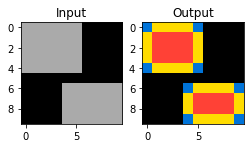

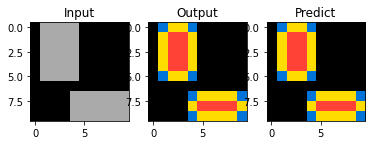

284it [00:14, 13.72it/s]

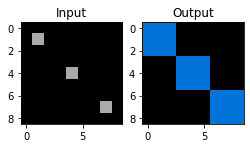

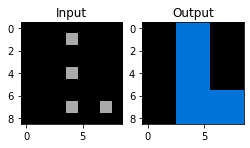

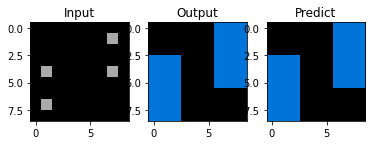

317it [00:15, 28.80it/s]

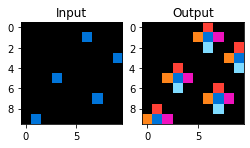

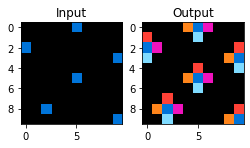

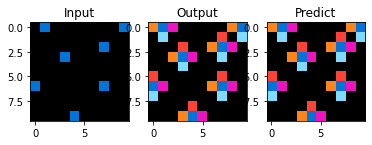

331it [00:15, 28.04it/s]

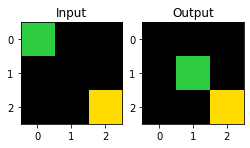

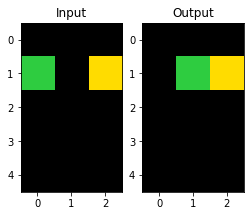

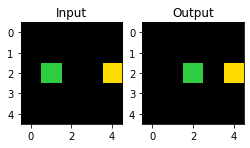

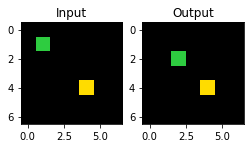

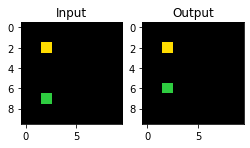

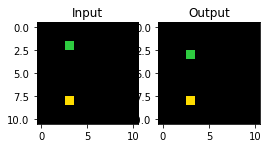

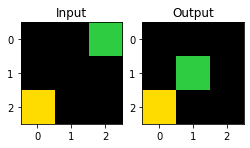

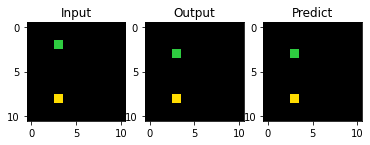

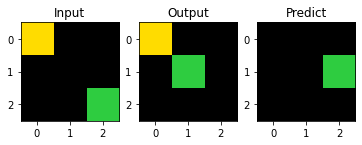

400it [00:16, 23.64it/s]


In [10]:
# Visualize correct tasks from evaluation data set
# This is the same as cmap used in our previous function
cmap = colors.ListedColormap(
        ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
         '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
norm = colors.Normalize(vmin=0, vmax=9)
    
def plot_pictures(pictures, labels):
    fig, axs = plt.subplots(1, len(pictures), figsize=(2*len(pictures),32))
    for i, (pict, label) in enumerate(zip(pictures, labels)):
        axs[i].imshow(np.array(pict), cmap=cmap, norm=norm)
        axs[i].set_title(label)
    plt.show()
    

def plot_sample(sample, predict=None):
    if predict is None:
        plot_pictures([sample['input'], sample['output']], ['Input', 'Output'])
    else:
        plot_pictures([sample['input'], sample['output'], predict], ['Input', 'Output', 'Predict'])



# Plot all solved tasks in training data set
for task, prediction, solved in tqdm(zip(train_tasks, train_predictions, train_solved)):
    if solved:
        for i in range(len(task['train'])):
            plot_sample(task['train'][i])

        for i in range(len(task['test'])):
            plot_sample(task['test'][i], prediction[i])
        

#### Evaluation Data

In the evaluation data, our model was only able to solve 0.7% of the tasks correctly. It can be seen that the close-predicted image, including exactly the same, is 11.5%, and the completely differently predicted image is 42% percent according to the second method.

In [11]:
evaluation_result, evaluation_predictions = evaluate(evaluation_tasks)
evaluation_solved = [any(score) for score in evaluation_result]

total = sum([len(score) for score in evaluation_result])
print(f"solved : {sum(evaluation_solved)} from {total} ({sum(evaluation_solved)/total})")

100%|██████████| 400/400 [1:16:37<00:00, 11.49s/it]

solved : 3 from 419 (0.007159904534606206)


In [12]:
print('Accuracy method2 of evaluation')
evaluate2(predictions = evaluation_predictions, tasks = evaluation_tasks)

Accuracy method2 of evaluation


C:\Users\AGall\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


,Class,Counts,Percents
0,Similar to original,46,0.115
1,Many error occur,186,0.465
2,Completely different,168,0.420


0it [00:00, ?it/s]

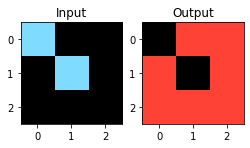

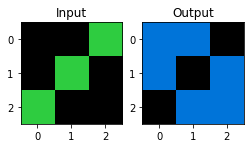

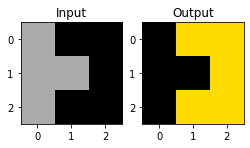

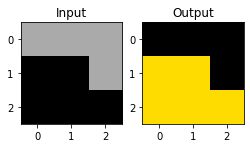

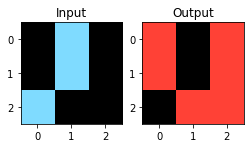

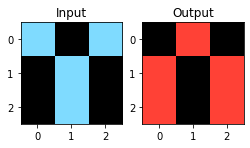

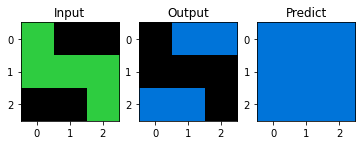

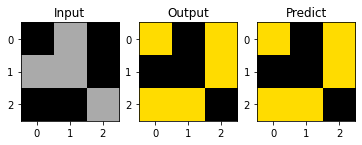

170it [00:01, 99.90it/s]

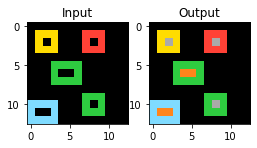

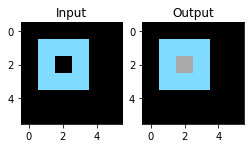

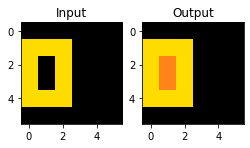

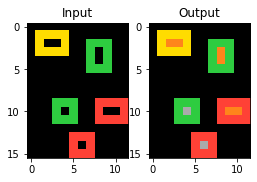

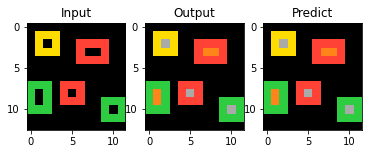

200it [00:02, 71.12it/s]

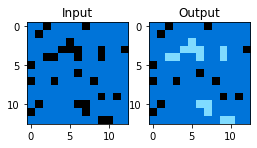

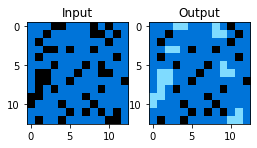

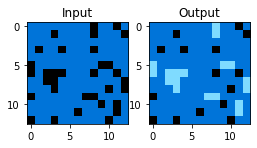

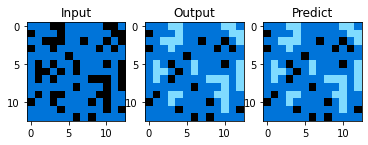

400it [00:03, 116.42it/s]


In [13]:
# Plot all solved tasks in evaluation data set
for task, prediction, solved in tqdm(zip(evaluation_tasks, evaluation_predictions, evaluation_solved)):
    if solved:
        for i in range(len(task['train'])):
            plot_sample(task['train'][i])
            
        for i in range(len(task['test'])):
            plot_sample(task['test'][i], prediction[i])

### Discussion

Overall, our model performed relatively well in the training data set, but poorly in the evaluation data set. Research from cognitive neuroscience may provide some insight into why our CNN model did not perform well. 

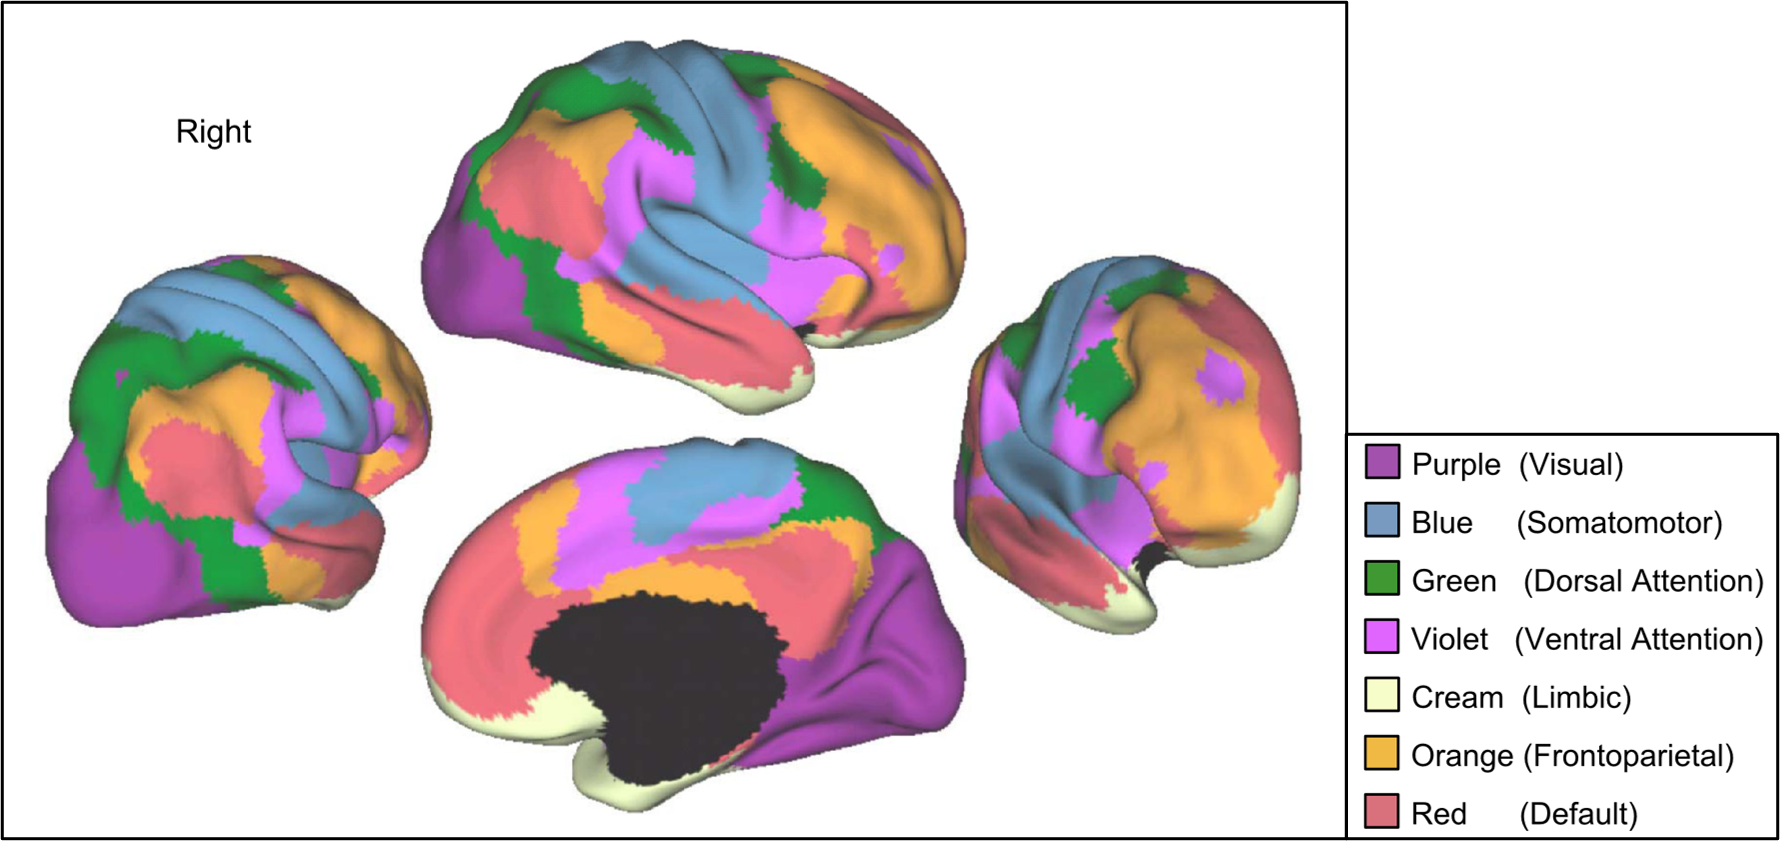

Above is a figure showing all of the major networks in the human brain. The regions in orange correspond to the fronto-parietal control network. 



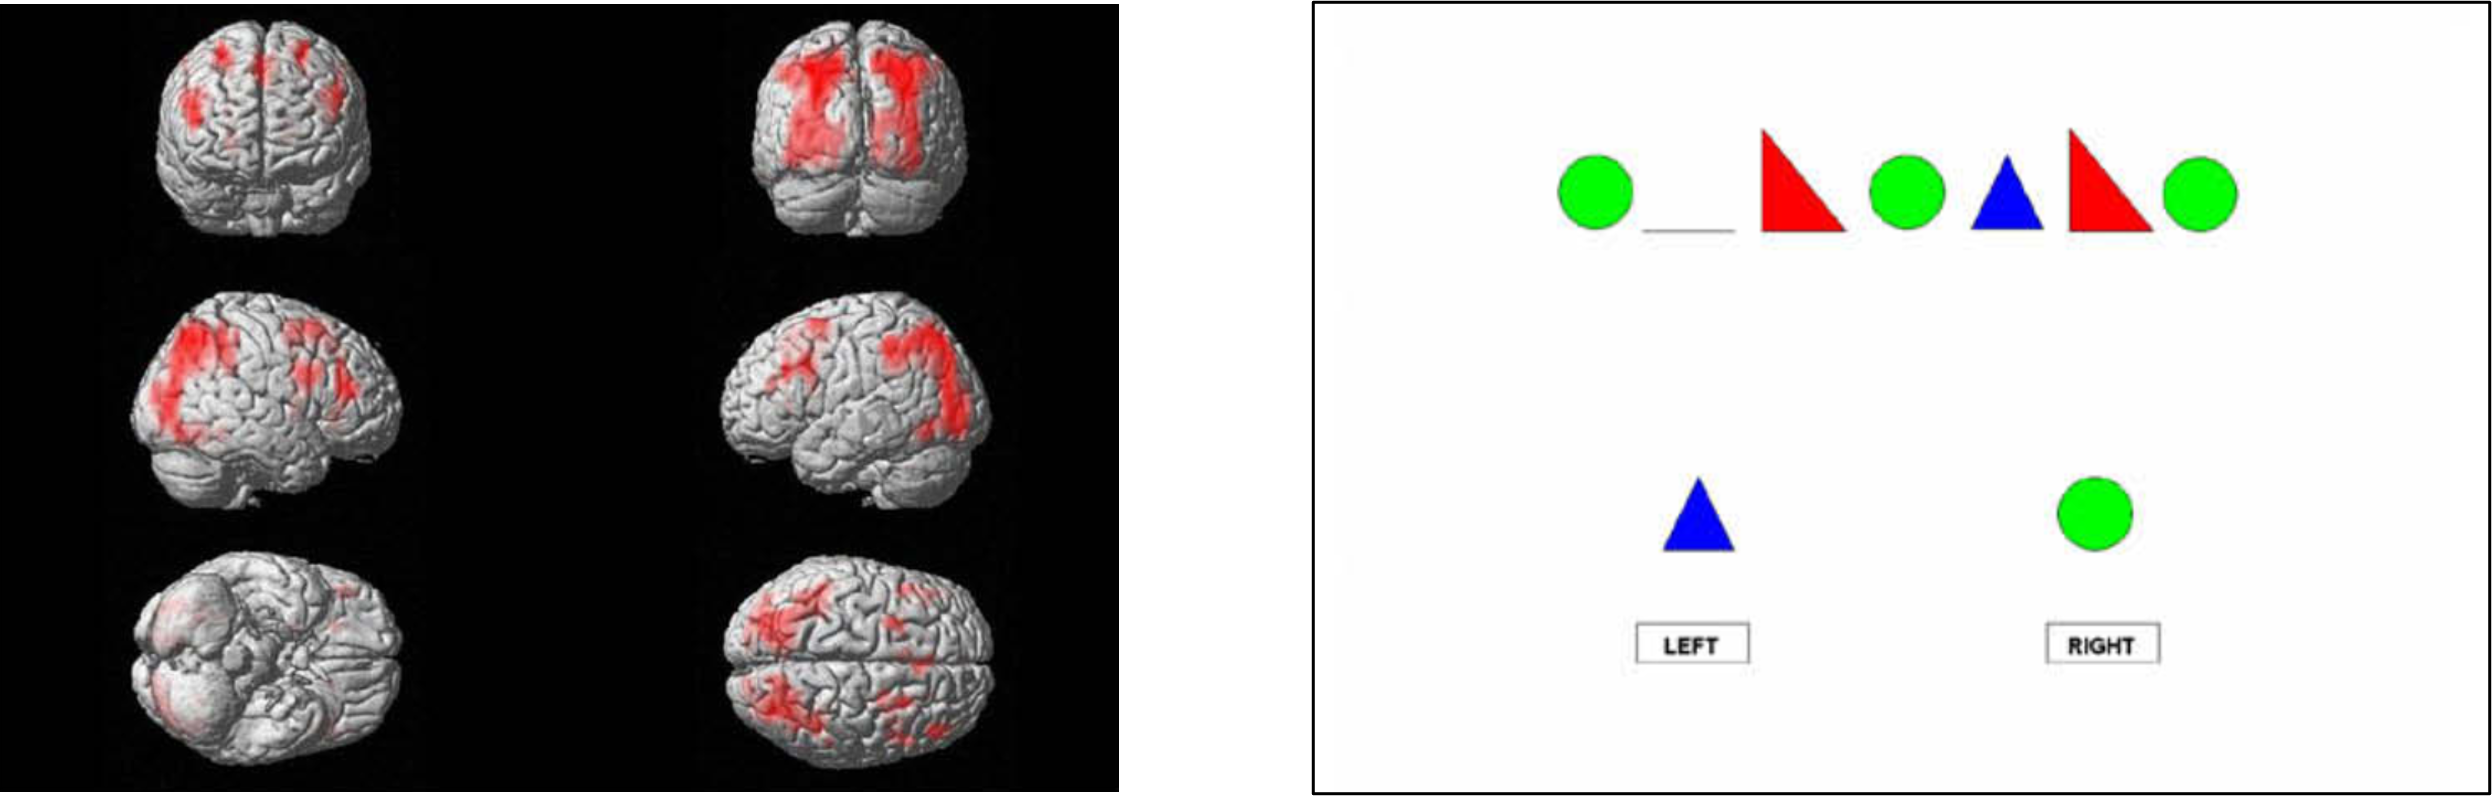

This is a figure from a study showing the brain regions that are most involved in completing an abstract reasoning task. While this task is more simple than the one presented in this report, it still likely requires the fronto-parietal control network, as shown by how the brain regions are similar to those in the previous figure. This illustrates that visual abstract reasoning doesn't only require patterns in visual stimuli (which is represented by activity in the back of the brain), but it also requires knowledge, previous experience, and cognitive control (which is represented by activity in the front of the brain). However, our CNN does not take into account any previous experience with the larger world, and thus, performed poorly. Models that have some domain knowledge will likely perform better.

This hypothesis is confirmed given that all of the teams that scored in the top three in this challenge on [Kaggle](https://www.kaggle.com/c/abstraction-and-reasoning-challenge/leaderboard) created a domain specific language, along with machine learning or other deep learning models, to solve this problem. 

A major improvement in this area would be to develop a model that can obtain generalized experience with many different kinds of stimuli and environments, without a domain specific language being developed. Such a model would be much closer to human cognition.

#### Author Roles

All three authors contributed to problem solving the code created and used in this report, and for editing this final report. Austin was responsible for running the final model, presenting the discussion portion of the final presentation, and writing the first draft of this report. Jay found coding examples and other resources from Kaggle and other websites that was essential to the success of this project. He also developed the second scoring code used in this project. Jay was also responsible for presenting the method/results portion of our final presentation. Changhee prepared the final presentation, presented the introduction portion of our final presentation, and was essential in organizing and planning our approach to this report.

